In [1]:
import os 
import glob

circles_files = glob.glob("twitter/*.circles")
edges_files = glob.glob("twitter/*.edges")
egofeat_files = glob.glob("twitter/*.egofeat")
feat_files = glob.glob("twitter/*.feat")
featnames_files = glob.glob("twitter/*.featnames")

In [2]:
import numpy as np

In [1]:
# circles_files

In [3]:
def read_features(featname):
    features = {}
    featnames = []
    for line in open(featname):
        lst = line.split(' ')            
        nodeId, fts = lst[0], lst[1:]
        features[nodeId] = fts
    return features

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def read_features_trial(featname):
    features = {}
    featnames = []
    nodeIdSim = {}
    file= open(featname)
    file_lst = file.readlines()
    fin_rslt = [[None for i  in range(len(file_lst))] for j in range(len(file_lst))]
    for line in file_lst:
        lst = line.split(' ')            
        nodeId, fts = lst[0], lst[1:]
#         features[nodeId] = fts
        for line1 in open(featname):
            nodeIdRel = ()
            lst1 = line1.split(' ')
            nodeId1,fts1 = lst1[0],lst1[1:]
            nodeIdRel=(nodeId,nodeId1)
            fts = np.asarray(fts)
            fts = fts.reshape(1,-1)
            fts1 = np.asarray(fts1)
            fts1 = fts1.reshape(1,-1)
            similarity = cosine_similarity(fts,fts1)
            nodeIdSim[nodeIdRel] = similarity[0][0]
            fin_rslt = similarity[0][0]
    return fin_rslt
#     return myResult

SyntaxError: invalid syntax (<ipython-input-90-6b92881ac3a9>, line 10)

In [114]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def read_features_trial_2(featname):
    features = {}
    featnames = []
    nodeIdSim = {}
    file= open(featname)
    file_lst = file.readlines()
    fin_rslt = [[None for i  in range(len(file_lst))] for j in range(len(file_lst))]
    for i in range(len(file_lst)):
        lst = file_lst[i].split(" ")
        nodeId1,fts1 = lst[0],lst[1:]
        fts1 = np.asarray(fts1)
        fts1 = fts1.reshape(1,-1) 
        j = 0
        while(j < len(file_lst)):
            nodeIdRel = ()
            lst2 = file_lst[j].split(' ')            
            nodeId2,fts2 = lst2[0],lst2[1:]
            nodeIdRel=(nodeId1,nodeId2)
            fts2 = np.asarray(fts2)
            fts2 = fts2.reshape(1,-1)
            similarity = cosine_similarity(fts1,fts2)
            nodeIdSim[nodeIdRel] = similarity[0][0]
            fin_rslt[i][j] = 1 - similarity[0][0]
            j+=1
    return fin_rslt

In [115]:
user_feat_2 = read_features_trial_2("twitter/237845487.feat")

In [116]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

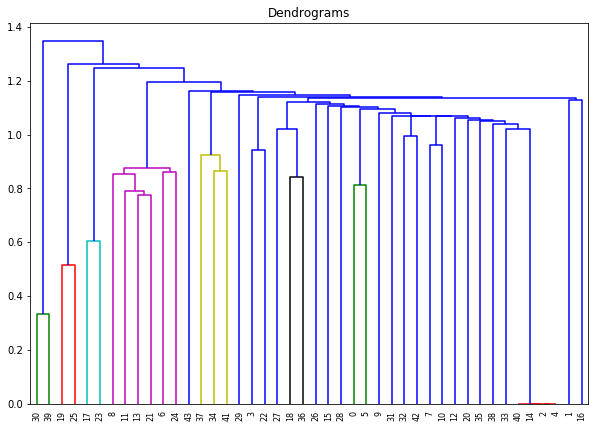

In [117]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(user_feat_2))


In [118]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=16, affinity="precomputed",linkage="complete")  
cluster.fit_predict(user_feat_2)

array([ 0,  1,  0,  0,  0,  0,  2,  0,  2,  5,  0,  2,  0,  3,  0,  0,  1,
       15,  7,  6,  0,  3,  0, 15,  2,  6,  2, 13,  5,  2, 11, 10, 12,  9,
        1,  8,  7,  1, 14, 11,  4,  1, 12,  3], dtype=int64)

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [49]:
user_feat =read_features("twitter/237845487.feat")

In [91]:
user_feat =read_features_trial("twitter/237845487.feat")

NameError: name 'file_lst' is not defined

In [69]:
len(user_feat)

1892

In [142]:
def read_featurenames(filename):
    lst_mp = []
    for line in open(filename):
        lst = line.split(' ')            
        index, value = lst[0], lst[1][:-1]
        print(value)
        lst_mp.append(lst[1][:-1])
    return lst_mp
        

In [143]:
feat_lst =read_featurenames("twitter/237845487.featnames")

#...
#1
#3
#FF
#Follow
#Gay
#HotInCleveland
#LGBT
#NOH8
#OV101
#SO
#SocialMedia
#StarTrek
#Sunday
#Vancouver
#WorldMalariaDay
#awesome
#earthday
#equality
#fb
#gay
#humor
#lgbt
#socent
#startrek
#talent
@...
@ActuallyNPH
@Adam_Barta:
@AddThis
@AndrewWerner
@AnnaMariaPdT:
@BlairKShep
@BlairKShep:
@BroadwayGirlNYC
@BwayGodspell
@BwayGodspell!
@BwayGodspell's
@BwayGodspell.
@BwayGodspell:
@CNNGeekOut:
@CoryDStewart
@David
@ENews
@FVevents
@FicklePucker
@Fordstaff
@Fordstaff:
@FrankHommeTown
@GeorgeTakei
@GeorgeTakei!
@GeorgeTakei.
@GeorgeTakei:
@GroupG3
@GuyChambers2
@HollyConrad
@HowardStern
@JaneMonheit
@JuliaMurney
@KevinHommeTown
@LindsayMendez:
@LisaLampanelli
@MJDWarner
@MsLeaSalonga
@MsLeaSalonga:
@NASA
@NASA:
@NYC1109
@NoReservations
@PennJillette
@Rick_Rainbow
@Rick_Rainbow:
@RuPaul
@RuPaulsDragRace
@ScottAlanNet
@SethMacFarlane
@Sharon_Needles,
@ShatnersWorld
@SzebastianOne:
@THR
@TellyLeung
@TheAdvocateMag:
@TheOldGlobe
@TheRealNimoy
@TheWebbyAwards
@TrevorMcQueen
@TrevorMcQuee

In [128]:
feat_lst

['#...',
 '#1',
 '#3',
 '#FF',
 '#Follow',
 '#Gay',
 '#HotInCleveland',
 '#LGBT',
 '#NOH8',
 '#OV101',
 '#SO',
 '#SocialMedia',
 '#StarTrek',
 '#Sunday',
 '#Vancouver',
 '#WorldMalariaDay',
 '#awesome',
 '#earthday',
 '#equality',
 '#fb',
 '#gay',
 '#humor',
 '#lgbt',
 '#socent',
 '#startrek',
 '#talent',
 '@...',
 '@ActuallyNPH',
 '@Adam_Barta:',
 '@AddThis',
 '@AndrewWerner',
 '@AnnaMariaPdT:',
 '@BlairKShep',
 '@BlairKShep:',
 '@BroadwayGirlNYC',
 '@BwayGodspell',
 '@BwayGodspell!',
 "@BwayGodspell's",
 '@BwayGodspell.',
 '@BwayGodspell:',
 '@CNNGeekOut:',
 '@CoryDStewart',
 '@David',
 '@ENews',
 '@FVevents',
 '@FicklePucker',
 '@Fordstaff',
 '@Fordstaff:',
 '@FrankHommeTown',
 '@GeorgeTakei',
 '@GeorgeTakei!',
 '@GeorgeTakei.',
 '@GeorgeTakei:',
 '@GroupG3',
 '@GuyChambers2',
 '@HollyConrad',
 '@HowardStern',
 '@JaneMonheit',
 '@JuliaMurney',
 '@KevinHommeTown',
 '@LindsayMendez:',
 '@LisaLampanelli',
 '@MJDWarner',
 '@MsLeaSalonga',
 '@MsLeaSalonga:',
 '@NASA',
 '@NASA:',
 '@NYC11

In [132]:
new_map = {}
map_items= {}
for key, value in user_feat.items():
    for i, val in enumerate(feat_lst):
        map_items[val] =value[i]
    new_map[key] = map_items

In [133]:
new_map

{'14755492': {'#...': '0',
  '#1': '0',
  '#3': '0',
  '#FF': '0',
  '#Follow': '0',
  '#Gay': '0',
  '#HotInCleveland': '0',
  '#LGBT': '0',
  '#NOH8': '0',
  '#OV101': '0',
  '#SO': '0',
  '#SocialMedia': '0',
  '#StarTrek': '0',
  '#Sunday': '0',
  '#Vancouver': '0',
  '#WorldMalariaDay': '0',
  '#awesome': '0',
  '#earthday': '0',
  '#equality': '0',
  '#fb': '0',
  '#gay': '0',
  '#humor': '0',
  '#lgbt': '0',
  '#socent': '0',
  '#startrek': '0',
  '#talent': '0',
  '@...': '0',
  '@ActuallyNPH': '0',
  '@Adam_Barta:': '0',
  '@AddThis': '0',
  '@AndrewWerner': '1',
  '@AnnaMariaPdT:': '0',
  '@BlairKShep': '1',
  '@BlairKShep:': '0',
  '@BroadwayGirlNYC': '0',
  '@BwayGodspell': '0',
  '@BwayGodspell!': '0',
  "@BwayGodspell's": '0',
  '@BwayGodspell.': '0',
  '@BwayGodspell:': '0',
  '@CNNGeekOut:': '0',
  '@CoryDStewart': '1',
  '@David': '1',
  '@ENews': '0',
  '@FVevents': '0',
  '@FicklePucker': '0',
  '@Fordstaff': '0',
  '@Fordstaff:': '0',
  '@FrankHommeTown': '1',
  '@G

In [109]:
read_features("twitter/237845487.feat")

{'14755492': ['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
 

In [4]:
egoNodeList = []
for item in circles_files:
    twitter, circleFilename = item.split("\\")
    #circleFilename = circleFilename[1]
   # print(circleFilename)
    filename, abcd = circleFilename.split(".")
    #print(filename)
    egoNodeList.append(filename)

In [5]:
print(len(egoNodeList))

973


In [6]:
# edges_files

In [7]:
def read_circles(filename):
    circles = []
    un_users = set()
    for line in open(filename):
        lst = line.split('\t')
#         e1, es = lst.split('\t')
        el, es = lst[0], lst[1:]
        circle = set()
        for e in es:
            circle.add(int(e))
            un_users.add(int(e))
        circles.append(circle)
    return circles, un_users

In [94]:
def read_following(filename):
    following = {}
    for line in open(filename):
        lst = line.split(' ')
        el, es = lst[0], lst[1][:-1]
        if el in following:
            following[el]+=[es]
        else:
            following[el]=[es]
    return following
        

In [95]:
read_following("twitter/237845487.edges")

{'177378039': ['31257471',
  '36628828',
  '15857462',
  '22027992',
  '28995973',
  '17093617',
  '415752096',
  '14328339',
  '24646282',
  '21596877',
  '214589342',
  '31685653'],
 '128956175': ['15227791', '18713254', '15846682'],
 '15857462': ['21596877',
  '214589342',
  '15846682',
  '177378039',
  '31257471',
  '214589522',
  '28995973',
  '31685653',
  '17093617',
  '24646282',
  '14328339',
  '6017542',
  '415752096'],
 '21596877': ['15857462',
  '214589342',
  '21692297',
  '28995973',
  '21414413',
  '246481013',
  '31685653',
  '18948541',
  '214589522',
  '90420314',
  '36628828',
  '14328339',
  '79797834',
  '24646282',
  '177378039'],
 '24646282': ['214589342',
  '177378039',
  '31685653',
  '21596877',
  '15857462',
  '14328339'],
 '214589522': ['28995973',
  '24646282',
  '21692297',
  '31685653',
  '214589342',
  '31257471',
  '15857462',
  '177378039',
  '21596877',
  '6017542',
  '14328339'],
 '214589342': ['31257471',
  '28995973',
  '15857462',
  '214589522',
 

In [8]:
users_circles = {}
users_un_users = {}
for ego in egoNodeList:
    filename = str(ego) + '.circles'
    circles, un_users = read_circles("twitter/" + filename)
    users_circles[ego] = circles
    users_un_users[ego] = un_users

In [12]:
users_un_users

{'100318079': {17116707,
  19493072,
  19933035,
  21146135,
  22462180,
  26929220,
  28465635,
  30971165,
  31414569,
  33612973,
  34428380,
  40981798,
  43003845,
  43640117,
  45333725,
  49104918,
  57828817,
  59588845,
  67864340,
  73738774,
  81446304,
  83032174,
  83943787,
  86221475,
  100052945,
  107830991,
  109740608,
  121533789,
  123371682,
  124528830,
  131613362,
  134940306,
  145845459,
  151338729,
  153226312,
  153460275,
  157829215,
  187773078,
  195475105,
  204140367,
  204317520,
  215787132,
  225444667,
  252770012,
  254839786,
  265077741,
  270449528,
  461410856},
 '10146102': {55113,
  9503302,
  11259362,
  14551276,
  15465769,
  17859804,
  17870886,
  17902348,
  20583098,
  44436825,
  83876527,
  451331227},
 '101859065': {15999863,
  22784458,
  28149277,
  29514951,
  34805698,
  51477206,
  82030021,
  90722891,
  90779436,
  95980722,
  101903164,
  111164068,
  118811608,
  131601987,
  146556805,
  176872879,
  191620115,
  236575

In [86]:
users_circles["237845487"]

[{15227791, 15846682, 128956175, 149217510},
 {149217510},
 {15227791, 18713254, 128956175, 149217510},
 {15227791, 128956175, 149217510},
 {15227791, 18713254, 128956175, 149217510},
 {15227791, 128956175, 149217510},
 {15227791, 18713254, 128956175, 149217510},
 {15227791, 128956175, 149217510},
 {15227791, 128956175, 149217510},
 {15227791, 15846682, 18713254, 128956175, 149217510},
 {15227791, 15846682, 18713254, 128956175, 149217510},
 {15227791, 128956175},
 {15227791, 18520053, 18713254, 128956175},
 {15227791, 18713254, 128956175, 149217510},
 {15227791, 15846682, 18520053, 149217510},
 {15227791, 18713254, 128956175, 149217510}]

In [70]:
def read_nodeadjlist(filename):
    G = nx.DiGraph()
    for line in open(filename):
        lst = line.split(' ')
        el, es = lst[0], lst[1][:-1]
        G.add_edge(int(el),int(es))
    return G

In [71]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
G = read_nodeadjlist("twitter/237845487.edges")

In [73]:
G.size()

255

C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


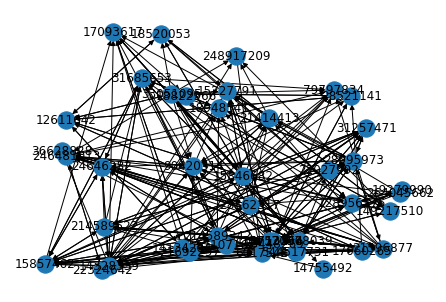

In [74]:
nx.draw_random(G, with_labels=True)
#nx.draw_random(G)
#nx.draw_networkx(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
plt.show()


In [76]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)

In [77]:
first_iteration_comm = tuple(sorted(c) for c in next(communities_generator))

In [78]:
first_iteration_comm

([6017542,
  12611642,
  14134204,
  14328339,
  14755492,
  15227791,
  15846682,
  15857462,
  17060265,
  17093617,
  18520053,
  18713254,
  18948541,
  19279990,
  20448269,
  21414413,
  21596877,
  21692297,
  22027992,
  22324642,
  24646282,
  28521141,
  28562317,
  28995973,
  31257471,
  31685653,
  33051095,
  36628828,
  57107167,
  79797834,
  90420314,
  128956175,
  149217510,
  177378039,
  214589342,
  214589522,
  246481013,
  248917209,
  264045662,
  415752096,
  544517731],
 [18822966])

In [79]:
dict(enumerate(first_iteration_comm))

{0: [6017542,
  12611642,
  14134204,
  14328339,
  14755492,
  15227791,
  15846682,
  15857462,
  17060265,
  17093617,
  18520053,
  18713254,
  18948541,
  19279990,
  20448269,
  21414413,
  21596877,
  21692297,
  22027992,
  22324642,
  24646282,
  28521141,
  28562317,
  28995973,
  31257471,
  31685653,
  33051095,
  36628828,
  57107167,
  79797834,
  90420314,
  128956175,
  149217510,
  177378039,
  214589342,
  214589522,
  246481013,
  248917209,
  264045662,
  415752096,
  544517731],
 1: [18822966]}

In [81]:
from helpers import create_color_map


In [82]:
community_map = map_communities(G, first_iteration_comm)
nx.set_node_attributes(G,community_map,  'community')
node_colors, color_map, palette = create_color_map(G, 'community')

C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


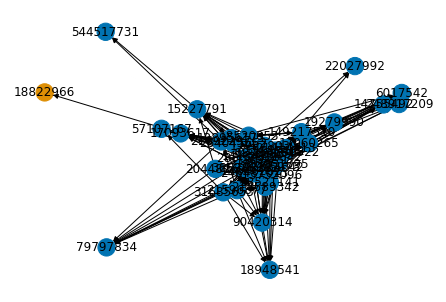

In [83]:
nx.draw(G, node_color=node_colors, with_labels=True)

In [104]:
G_twitter = nx.read_edgelist("twitter_combined/twitter_combined.txt", create_using= nx.Graph(), nodetype= int)

In [108]:
spring_pos = nx.spring_layout(G_twitter, iterations=5)

MemoryError: 

In [ ]:
plt.axis("off")
nx.draw_networkx(G_twitter, pos = spring_pos, with_labels  =False, node_size=35)

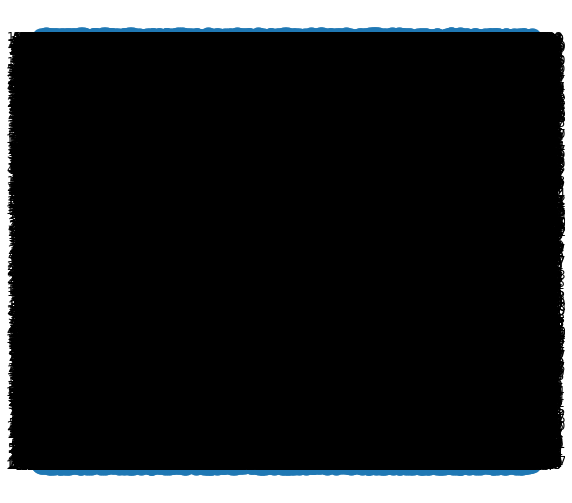

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure(figsize = (10,9))
plt.axis('off')
 

# print("Node Degree")
# for v in G_twitter:
#     print('%s %s' % (v, G_twitter.degree(v)))

#nx.draw_circular(G, with_labels=True)
nx.draw_random(G_twitter, with_labels=True)
#nx.draw_random(G)
#nx.draw_networkx(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
plt.show()
plt.savefig("map_0.png", format = "png", dpi = 300)

In [ ]:
# def build_graph(n):
#     edges = []
#     nodes = []
#     path = 'D:\KaggleGraphs\egonets\egonets'
#     egonets = load_egonet_files(path)
#     for egonet in egonets[n:n+1]:
#         ego = int(re.match( r'([0-9]+).egonet', egonet).group(1))
#         m = open(os.path.join(path,egonet), "r")
#         friends = [line[:-1].replace(':','').split(' ') for line in m.readlines()]
#         friends = [map(int, friend[:1]) if friend[1] == '' else map(int, friend) for friend in friends]
#         edges += [(ego,friend[0]) for friend in friends] 
        
#         for friend in friends:
#             edges += [(friend[0], user) for user in friend[1:] if len(friend)>1] 
        
#         nodes += list(itertools.chain.from_iterable(friends)) + [ego]
#     edges = list(set(tuple(sorted(edge)) for edge in edges))        
#     nodes = list(set(nodes))
#     G = nx.Graph()
#     G.add_nodes_from(nodes)
#     G.add_edges_from(edges)
    
#     return G, nodes

In [ ]:
fullG = nx.Graph() 
for line in open(filename):
    lst = line.split(' ')
    el, es = lst[0], lst[1:]
    circle = set()
    for e in es:
        if e == el: continue
        G.add_edge(int(el),int(e))
return G

In [28]:
def run_on_train(algorithm, power):
    ans = {}
    for userId in train_users:
        filename = str(userId) + '.edges'
        G = read_nodeadjlist(egonets_dir + filename)
        circles = algorithm(G, power)
        ans[userId] = circles
    return ans

{134940306: 1, 67864340: 1, 123371682: 1, 17116707: 1, 86221475: 1, 131613362: 1, 153460275: 1, 225444667: 1, 124528830: 1, 26929220: 1, 43003845: 2, 153226312: 1, 204140367: 1, 204317520: 1, 19493072: 1, 107830991: 1, 145845459: 1, 252770012: 1, 121533789: 1, 157829215: 1, 28465635: 1, 151338729: 1, 254839786: 1, 19933035: 1, 83943787: 1, 265077741: 1, 270449528: 1, 33612973: 1, 57828817: 1, 100052945: 1, 73738774: 1, 21146135: 1, 22462180: 1, 40981798: 1, 461410856: 2, 34428380: 1, 81446304: 1, 195475105: 1, 109740608: 1, 31414569: 1, 59588845: 1, 83032174: 1, 43640117: 1, 187773078: 1, 49104918: 1, 45333725: 1, 215787132: 1, 30971165: 1}
{11259362: 1, 9503302: 1, 17870886: 1, 15465769: 1, 55113: 1, 17902348: 1, 14551276: 1, 83876527: 1, 44436825: 1, 20583098: 1, 451331227: 1, 17859804: 1}
{131601987: 1, 111164068: 1, 82030021: 2, 22784458: 1, 191620115: 1, 15999863: 1, 236575672: 1, 28149277: 2, 146556805: 1, 90722891: 1, 90779436: 1, 95980722: 1, 51477206: 1, 34805698: 1, 29514951:

{245921664: 1, 198960001: 1, 16583554: 1, 180594821: 1, 27010707: 1, 33390997: 1, 373023781: 1, 350475558: 1, 194814003: 1, 337341109: 1, 236608311: 1, 36071352: 1, 337297720: 1, 47043006: 1, 25398335: 1, 1822401: 1, 314387523: 1, 101586116: 2, 105908808: 1, 23285065: 1, 63039565: 1, 377257678: 1, 221822164: 1, 317300698: 1, 19778144: 1, 42905704: 1, 18422387: 1, 23897332: 1, 208161395: 1, 28968742: 1, 44809515: 1, 21046220: 1, 109461645: 1, 37474190: 1, 18886637: 1, 158769099: 1, 27765265: 1, 25696562: 1, 174153467: 1, 20898939: 1, 32227292: 1, 17628862: 1, 103095263: 1, 39634561: 1, 243339650: 1, 35591563: 2, 23083404: 1, 38802447: 1, 50493844: 1, 254218516: 1, 7025662: 1, 281262231: 1, 160452633: 1, 27558050: 1, 6988452: 1, 17266725: 1, 20717476: 1, 38895273: 2, 72456617: 1, 20978103: 1, 14669368: 1, 147715266: 1, 18760392: 1, 350001997: 1, 23151437: 1, 40778319: 1, 25521487: 1, 23832022: 1, 156132825: 1, 19602537: 1, 67161329: 1, 171694583: 1, 240544888: 1, 10886522: 1, 115485051: 

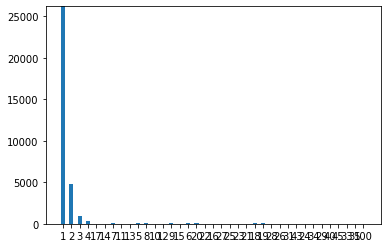

In [98]:
ans = {}
m = {}
for ego in egoNodeList:
    filename = str(ego) + '.circles'
    circles, un_users = read_circles("twitter/"  + filename)

    users_un_users = {}
    for circle in circles:
        for us in circle:
            if us not in users_un_users:
                 users_un_users[us]=1
            else:
                users_un_users[us]+=1
    print(users_un_users)
    v = {}
    for key, value in sorted(users_un_users.items()):
        v.setdefault(value, []).append(key)
    for key, value in v.items():
        if key not in ans:
            ans[key] = len(value)
        else:
            ans[key] += len(value)
    mm = 0
    for key, value in v.items():
        mm += key*len(value)
    if (len(un_users) != 0):
        m[ego] = (mm+0.0) / len(un_users)
d = ans        
X = np.arange(len(d))
plt.bar(X, d.values(), align='center', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.show()

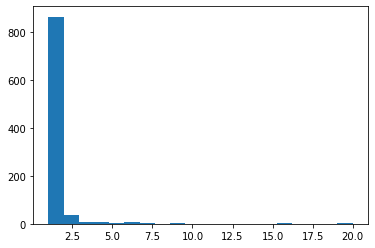

In [87]:
plt.hist(m.values(),20)
plt.show()

Node Degree
177378039 15
31257471 8
128956175 9
15227791 10
15857462 13
21596877 15
36628828 3
24646282 8
214589342 13
214589522 12
28995973 16
246481013 11
90420314 14
14328339 15
31685653 12
18713254 11
21692297 9
544517731 2
28521141 6
21414413 10
33051095 15
14755492 2
18948541 8
15846682 14
79797834 9
415752096 8
19279990 5
149217510 6
22324642 13
12611642 6
18520053 6
248917209 5
6017542 13
17093617 9
264045662 5
20448269 4
22027992 2
28562317 5
57107167 4
17060265 5
14134204 7
18822966 1


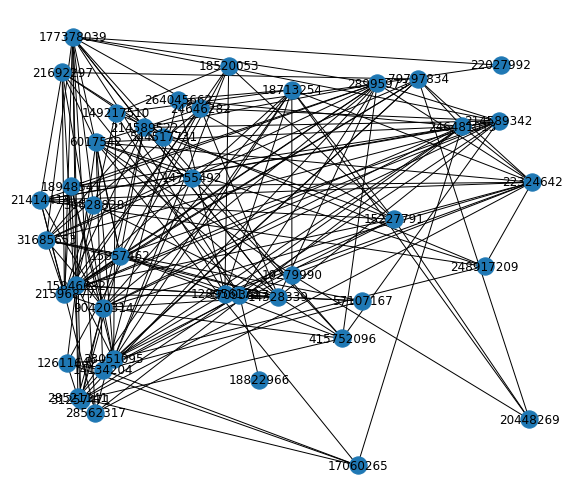

<Figure size 432x288 with 0 Axes>

In [48]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = read_nodeadjlist("twitter/237845487.edges")

plt.figure(figsize = (10,9))
plt.axis('off')
 

print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

#nx.draw_circular(G, with_labels=True)
nx.draw_random(G, with_labels=True)
#nx.draw_random(G)
#nx.draw_networkx(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
plt.show()
plt.savefig("map_0.png", format = "png", dpi = 300)

Node Degree
11336782 83
3594701 25
782329 33
849131 70
627363 62
2195241 25
89318473 17
15416485 57
5541662 20
15023 22
15438005 20
16993577 21
139750288 18
16624991 13
12307282 23
27111653 25
14352556 29
24741685 59
4044361 53
15363619 10
14616067 12
6376372 18
6515122 22
16930986 49
12101862 33
5746402 16
130584631 47
992031 40
12199652 69
1375251 10
14111698 39
18852278 45
16265198 10
13055 18
17220817 16
21437000 18
10461992 5
14091119 37
3839 40
14154082 8
813715 31
621713 42
6813682 27
15258591 27
15736732 21
5676102 70
14209885 38
24454827 11
2384071 65
1847381 17
13434092 37
14964767 51
16120265 53
6271152 8
15948437 35
14048987 20
229523 58
233693208 21
15294787 5
31354534 14
4958131 10
8168192 25
8091052 18
14079172 40
17034634 24
13535762 54
586 31
16186995 12
9460662 63
3640341 21
179980928 2
11375732 41
11362622 5
50393960 95
14874480 43
17800533 13
19459100 9
5725652 11
5849202 18
5385852 21
17800797 47
813491 21
6339822 32
7921352 22
361943754 7
113963 21
16727022 25
150

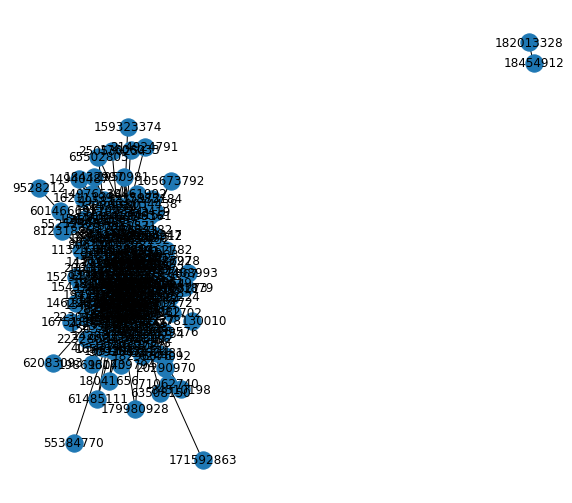

<Figure size 432x288 with 0 Axes>

In [54]:
G = read_nodeadjlist("twitter/78813.edges")

plt.figure(figsize = (10,9))
plt.axis('off')
 

print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))
#nx.draw_circular(G, with_labels=True)
#nx.draw_random(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
nx.draw_networkx(G, with_labels=True)

plt.show()
plt.savefig("map_1.png", format = "png", dpi = 300)

Total number of Edges= 182
Total number of Nodes= 42


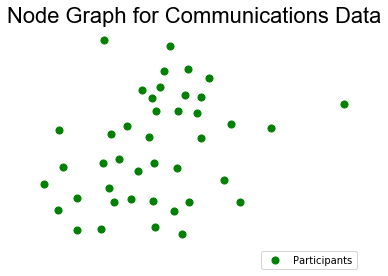

In [56]:
G = read_nodeadjlist("twitter/237845487.edges")
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Participants')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('base.png', dpi=400)

print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

Total number of Edges= 2257
Total number of Nodes= 231


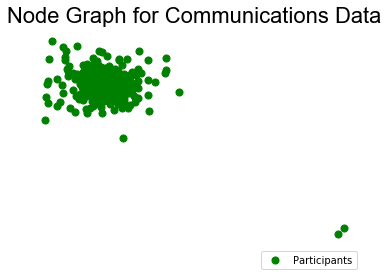

In [55]:
G = read_nodeadjlist("twitter/78813.edges")
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Participants')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('base.png', dpi=400)

print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

In [126]:
from networkx.algorithms import community
G = read_nodeadjlist("twitter/12831.edges")
communities_generator = community.girvan_newman(G)

In [127]:
import itertools


In [129]:
for communities in itertools.islice(communities_generator, 3):
    print(tuple(sorted(c) for c in communities)) 
    print("\n")

([14, 47, 380, 528, 586, 761, 1186, 2372, 6735, 12741, 19223, 22253, 51123, 148943, 287713, 606083, 636923, 638323, 652193, 662423, 663463, 668423, 713263, 728163, 757502, 765548, 883301, 1260231, 1371101, 1566521, 1678471, 1765921, 1859981, 2727051, 2735631, 3191321, 5264791, 5436752, 5634142, 5813712, 5827292, 5854882, 5994452, 6001592, 6088382, 6160742, 6253882, 6331462, 6368672, 6503412, 6687652, 6731422, 7415132, 7461782, 7821492, 8003822, 8067082, 8132642, 8479062, 8630302, 8630562, 8708232, 8866342, 8940282, 9283582, 9411772, 9611352, 9616792, 9767472, 9863222, 9943672, 10013512, 10044992, 10476462, 10587552, 11178592, 11322372, 12007182, 12081222, 12544312, 12725022, 12800212, 13019862, 13141442, 13334762, 13462502, 13538092, 13648692, 13652832, 13839772, 14086492, 14087951, 14142965, 14163141, 14172562, 14178728, 14202711, 14202817, 14220606, 14231571, 14267393, 14305022, 14313755, 14367669, 14450509, 14471007, 14710479, 14749606, 14809096, 14819149, 14838800, 14892191, 149042

In [113]:
first_iteration_comm = tuple(sorted(c) for c in next(communities_generator))


In [119]:
first_iteration_comm

([586,
  2038,
  2419,
  3839,
  11628,
  13055,
  13405,
  15023,
  113963,
  174853,
  229523,
  428333,
  621713,
  627363,
  643443,
  655613,
  656933,
  663273,
  697163,
  758185,
  782329,
  789314,
  793219,
  806170,
  813491,
  813715,
  817386,
  821449,
  849131,
  949161,
  992031,
  1018211,
  1375251,
  1594501,
  1847381,
  1950981,
  1976611,
  2195241,
  2384071,
  3361871,
  3375371,
  3388481,
  3558801,
  3594701,
  3640341,
  4044361,
  4958131,
  5027041,
  5362182,
  5385852,
  5435752,
  5497452,
  5541662,
  5637652,
  5676102,
  5725652,
  5746402,
  5796972,
  5849202,
  5963912,
  6217542,
  6244092,
  6271152,
  6339822,
  6376372,
  6515122,
  6813682,
  7434252,
  7684302,
  7921352,
  7924912,
  8091052,
  8168192,
  9184682,
  9235972,
  9363302,
  9460662,
  9462782,
  9528212,
  9535182,
  10359172,
  10461992,
  10751252,
  10760422,
  11323282,
  11336782,
  11362622,
  11375732,
  12101862,
  12199652,
  12307282,
  13170222,
  13434092,
  135357

In [114]:
dict(enumerate(first_iteration_comm))

{0: [586,
  2038,
  2419,
  3839,
  11628,
  13055,
  13405,
  15023,
  113963,
  174853,
  229523,
  428333,
  621713,
  627363,
  643443,
  655613,
  656933,
  663273,
  697163,
  758185,
  782329,
  789314,
  793219,
  806170,
  813491,
  813715,
  817386,
  821449,
  849131,
  949161,
  992031,
  1018211,
  1375251,
  1594501,
  1847381,
  1950981,
  1976611,
  2195241,
  2384071,
  3361871,
  3375371,
  3388481,
  3558801,
  3594701,
  3640341,
  4044361,
  4958131,
  5027041,
  5362182,
  5385852,
  5435752,
  5497452,
  5541662,
  5637652,
  5676102,
  5725652,
  5746402,
  5796972,
  5849202,
  5963912,
  6217542,
  6244092,
  6271152,
  6339822,
  6376372,
  6515122,
  6813682,
  7434252,
  7684302,
  7921352,
  7924912,
  8091052,
  8168192,
  9184682,
  9235972,
  9363302,
  9460662,
  9462782,
  9528212,
  9535182,
  10359172,
  10461992,
  10751252,
  10760422,
  11323282,
  11336782,
  11362622,
  11375732,
  12101862,
  12199652,
  12307282,
  13170222,
  13434092,
  135

In [80]:
def map_communities(G, communities):
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [116]:
from helpers import create_color_map


In [117]:
community_map = map_communities(G, first_iteration_comm)
nx.set_node_attributes(G,community_map,  'community')
node_colors, color_map, palette = create_color_map(G, 'community')

C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


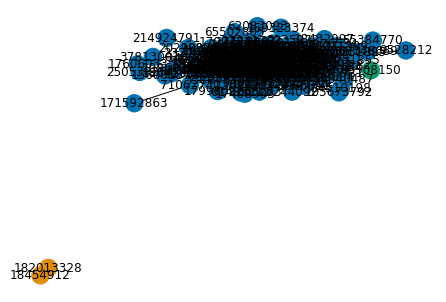

In [118]:
nx.draw(G, node_color=node_colors, with_labels=True)
